In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Data Understanding, Cleaning, Visualizations

### Exploratory Data Analysis

In [163]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From the data informations above, we can see that:

*   **Number of entries:** There are 200 entries in the dataset.
*   **Column information:** It lists each column, the number of non-null entries in each column, and the data type of each column.
*   **Data types:** There are four columns with integer data types (`CustomerID`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`) and one column with an object data type (`Gender`).
*   **Memory usage:** The memory usage of the DataFrame is approximately 7.9+ KB.

In [165]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


We can see from above description that :

*   **Count:** All numerical columns have 200 non-null entries, confirming no missing values.
*   **Mean:** The average age is around 38.85, average annual income is about $60.56k, and the average spending score is around 50.20.
*   **Standard Deviation:** The standard deviations show the spread of the data. Spending Score has a relatively high standard deviation (25.82), indicating a wider spread of scores compared to Age and Income.
*   **Min and Max:** The minimum age is 18 and the maximum is 70. The minimum annual income is $15k and the maximum is $137k. The spending scores range from 1 to 99.
*   **Percentiles (25%, 50%, 75%):** These show the distribution of the data. For example, 50% of the customers have an annual income of $61.5k or less, and 75% have a spending score of 73 or less.

In [166]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)":"Spending Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Spending Score',
    color='Spending Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Annual Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

This 3D scatter plot visualizes the relationship between Age, Annual Income, and Spending Score. It allows us to see how these three features are distributed together in a three-dimensional space.

Looking at this plot, you can observe the distribution of customers based on these three characteristics. While it might not show as clear cluster boundaries as the post-clustering 3D plot, you can still look for areas where data points are denser, suggesting potential groupings of customers with similar Age, Income, and Spending Score profiles. This initial 3D visualization helps in understanding the overall structure and potential complexities of the data before applying clustering algorithms.

# Data Transformation

In [168]:
# Encode Gender from categorical to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


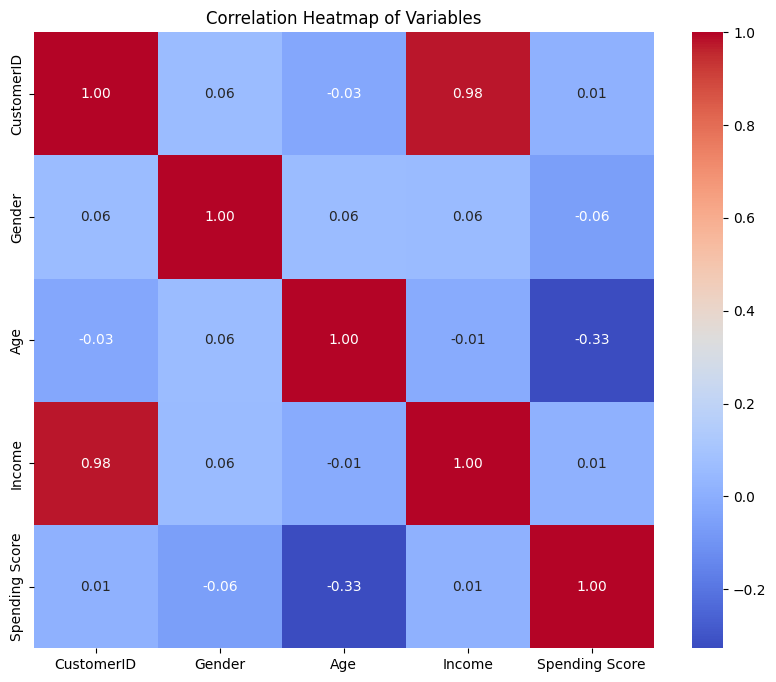

In [169]:
#Visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

From this heatmap, we can see that:

* There is a weak positive correlation between 'Age' and 'Income'.
* There is a weak negative correlation between 'Age' and 'Spending Score'.
* There is a weak positive correlation between 'Income' and 'Spending Score'.
* There is a weak positive correlation between 'Gender' and 'Income'.
* There is a weak negative correlation between 'Gender' and 'Spending Score'.

Overall, there are no strong linear relationships between these variables based on the correlation coefficients.

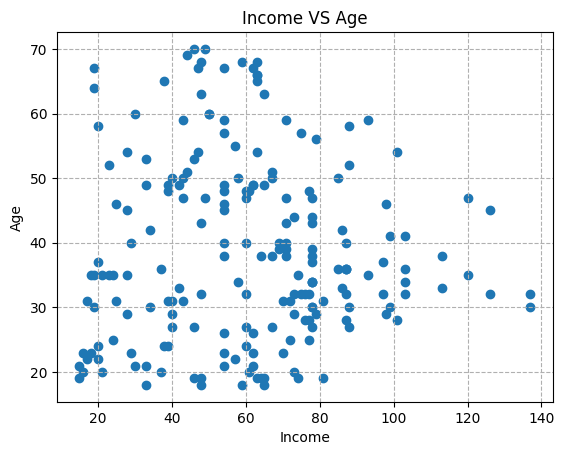

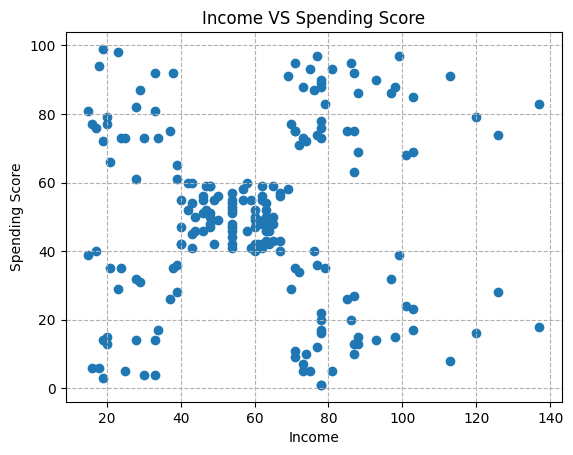

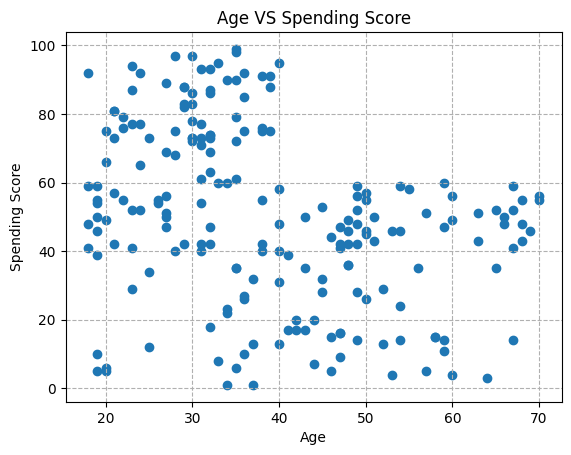

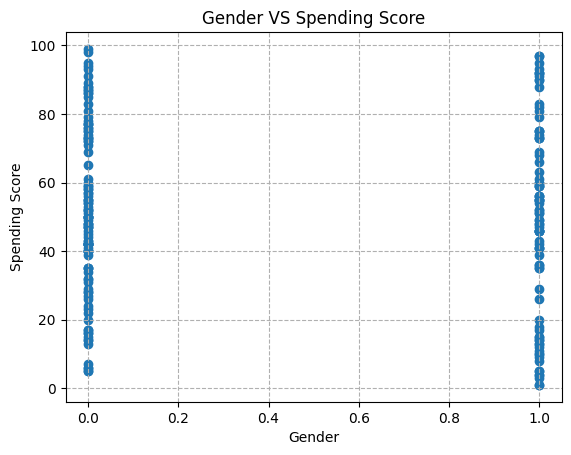

In [170]:
# To know the relationship between Income and Age
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

# To know the relationship between Income and Spending Score
plt.scatter(df['Income'], df['Spending Score'])
plt.title('Income VS Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

# To know the relationship between Age and Spending Score
plt.scatter(df['Age'], df['Spending Score'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

# To know the relationship between Gender and Spending Score
plt.scatter(df['Gender'], df['Spending Score'])
plt.title('Gender VS Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plots shows :

*   **Income VS Age:** This scatter plot shows the relationship between Annual Income and Age. There doesn't appear to be a strong linear relationship. There's a spread of income across different age groups.
*   **Income VS Spending Score:** This scatter plot shows the relationship between Annual Income and Spending Score. This plot seems to show some potential clusters or patterns, particularly groups of customers with high income and high spending, high income and low spending, and low income and high spending. This suggests that these two variables might be useful for segmentation.
*   **Age VS Spending Score:** This scatter plot shows the relationship between Age and Spending Score. There appears to be a weak negative trend, where older customers tend to have lower spending scores. However, there is still a wide spread of spending scores across different age groups.
*   **Gender VS Spending Score:** This scatter plot shows the relationship between Gender and Spending Score. Since 'Gender' is a categorical variable represented numerically (likely 0 for Female and 1 for Male based on previous steps), the points are aligned vertically. It's difficult to discern a clear pattern or significant difference in spending scores between genders from this plot alone. A box plot or violin plot might be more suitable for visualizing this relationship.

In [171]:
# Create new dataframe that consist only annual income and spending score
df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Data Scaling

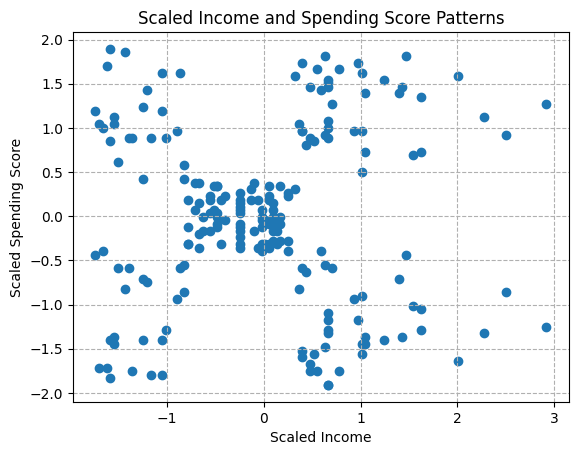

In [172]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df[['Income', 'Spending Score']]), columns=['Income', 'Spending Score'])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Income"], df_sc_scaled["Spending Score"])
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Scaled Income and Spending Score Patterns")
plt.show()

This scatter plot shows the distribution of customers based on their scaled annual income and scaled spending score. Even after scaling, you can observe distinct groupings or clusters of customers in this plot. These clusters represent different customer segments with similar income and spending patterns. This visualization reinforces why 'Income' and 'Spending Score' are good features to use for clustering.

# K-Means Clustering

In [173]:
from sklearn.cluster import KMeans

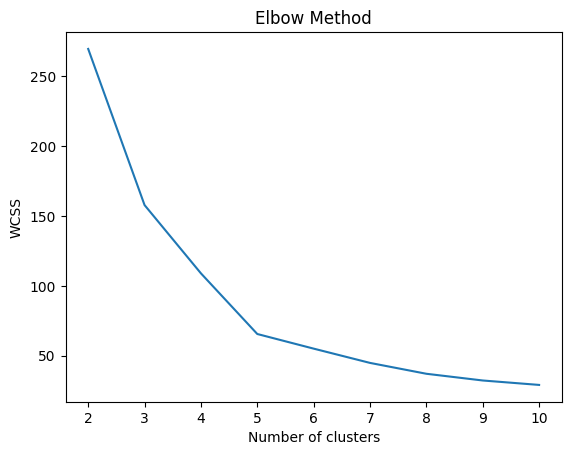

In [174]:
wcss = []
for i in range(2, 11):  # cluster 2-11
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [175]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  269.299343
1                   3  157.704008
2                   4  108.921317
3                   5   65.568408
4                   6   55.114226
5                   7   44.911186
6                   8   37.148117
7                   9   32.345838
8                  10   29.178990


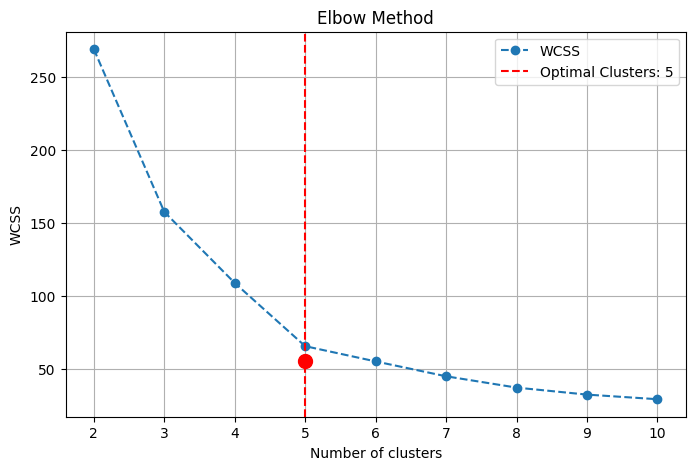

The optimal number of clusters is: 5


In [176]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In this plot, the elbow point appears to be at K=5. This suggests that 5 is the optimal number of clusters for this dataset because adding more than 5 clusters does not provide a substantial improvement in reducing the within-cluster variation. The KneeLocator algorithm also automatically identified 5 as the optimal number of clusters.

In [177]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Income,Spending Score,KMeans_Cluster
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


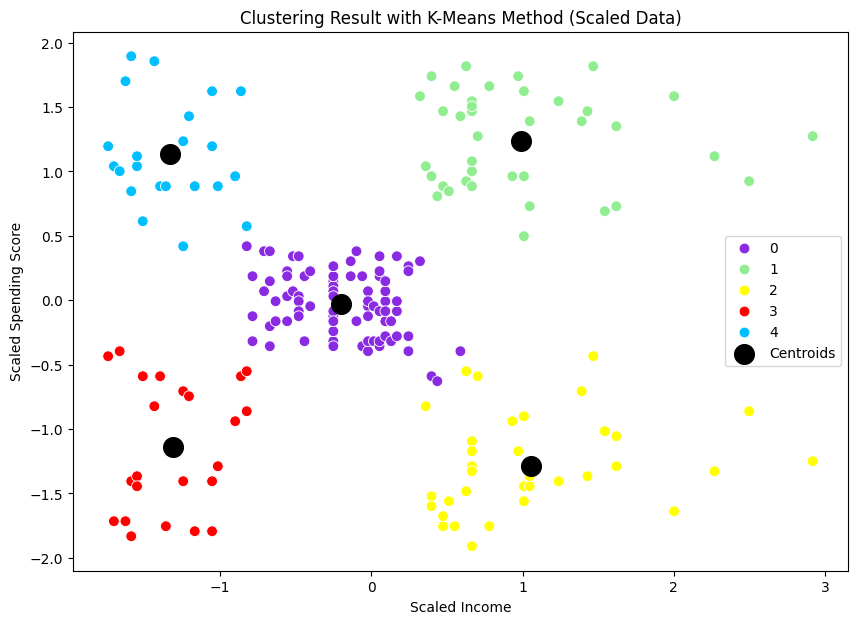

In [178]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "lightgreen", "yellow", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

The scatter plot above shows the customers segmented into 5 clusters based on their scaled income and spending scores. You can clearly see the distinct groupings that the K-Means algorithm identified. The black dots represent the centroids of each cluster. This visualization helps us understand the different customer segments that have been created.



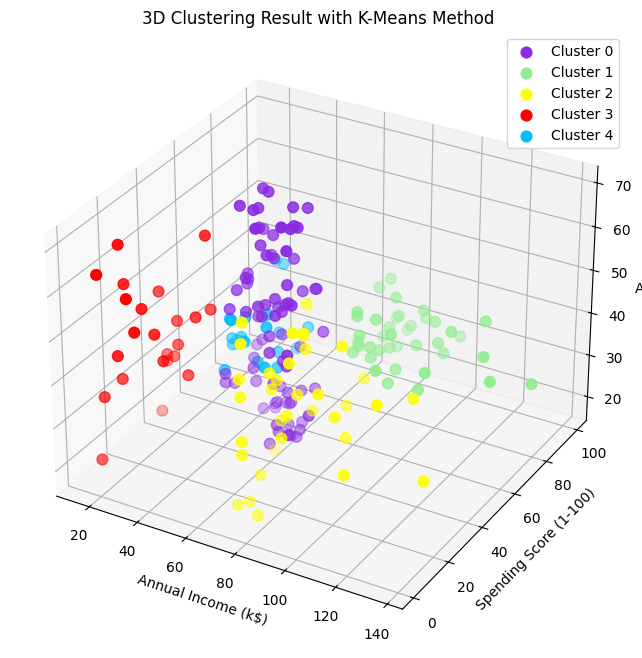

In [179]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ["blueviolet", "lightgreen", "yellow", "red", "deepskyblue"]

for i in range(5):
    ax.scatter(df['Income'][df['KMeans_Cluster'] == i],
               df['Spending Score'][df['KMeans_Cluster'] == i],
               df['Age'][df['KMeans_Cluster'] == i],
               c=colors[i], label=f'Cluster {i}', s=60)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('3D Clustering Result with K-Means Method')
ax.legend()
plt.show()

The 3D scatter plot above allows us to observe how the clusters are separated based on these three features simultaneously.

While the primary separation of the clusters was based on Income and Spending Score (as seen in the 2D plot), the 3D visualization helps to see if Age plays a significant role in further differentiating these segments. You can rotate the plot to view the clusters from different angles and see if there are any clear patterns or separations along the Age axis within the existing Income and Spending Score based clusters.

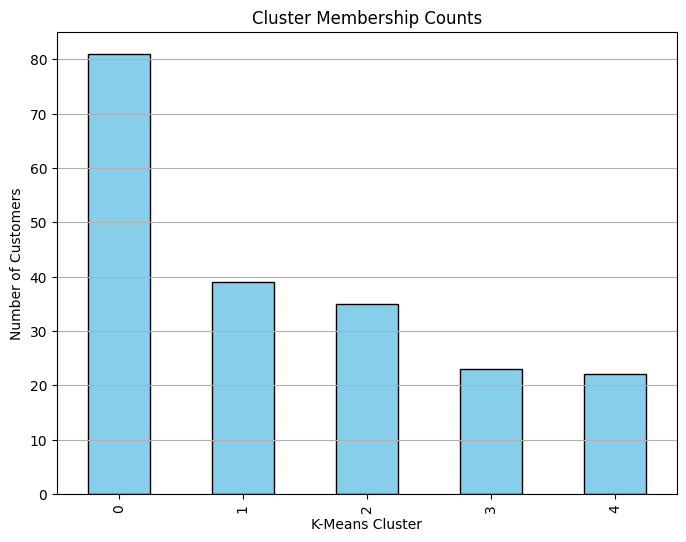

In [180]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


The bar plot above shows the number of customers in each of the 5 clusters. This gives us an idea of the size of each customer segment.

In [183]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'], 'Income': ['mean', 'min', 'max'],
                                              'Spending Score': ['mean', 'min', 'max'], 'Gender' : ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income          Spending Score          \
                     mean min max       mean min  max           mean min max   
KMeans_cluster                                                                 
0               42.716049  18  70  55.296296  39   76      49.518519  34  61   
1               32.692308  27  40  86.538462  69  137      82.128205  63  97   
2               41.114286  19  59  88.200000  70  137      17.114286   1  39   
3               45.217391  19  67  26.304348  15   39      20.913043   3  40   
4               25.272727  18  35  25.727273  15   39      79.363636  61  99   

                  Gender          
                    mean min max  
KMeans_cluster                    
0               0.407407   0   1  
1               0.461538   0   1  
2               0.542857   0   1  
3               0.391304   0   1  
4               0.409091   0   1

## Cluster Profiling

Based on the K-Means clustering and the cluster summary statistics, we can profile each cluster and outline potential managerial implications:

**Cluster 0: Mid-Income, Mid-Spending**
*   **Summary:** Average age (~43), average income (~$55k), average spending score (~50). Largest cluster.
*   **Persona:** These are likely the general customer base, not particularly high or low in income or spending. They represent a broad segment of the mall visitors.
*   **Managerial Implications:**
    *   **Targeting:** Broad marketing campaigns.
    *   **Campaign Channels:** Mix of online and offline channels.
    *   **Pricing/Offer Design:** Value-based pricing, general promotions.
    *   **Retention Ideas:** Loyalty programs, personalized recommendations based on past purchases.

**Cluster 1: High-Income, High-Spending (Target Customers)**
*   **Summary:** Younger average age (~33), high income (~$87k), high spending score (~82).
*   **Persona:** These are likely affluent customers who are enthusiastic shoppers. They are valuable and likely respond well to premium offerings.
*   **Managerial Implications:**
    *   **Targeting:** Premium segment, focus on high-value products/services.
    *   **Campaign Channels:** Exclusive events, targeted digital marketing, luxury brand collaborations.
    *   **Pricing/Offer Design:** Premium pricing, exclusive offers, early access to new arrivals.
    *   **Retention Ideas:** VIP programs, personalized high-end product recommendations, exceptional customer service.

**Cluster 2: High-Income, Low-Spending**
*   **Summary:** Average age (~41), high income (~$88k), low spending score (~17).
*   **Persona:** These customers have high purchasing power but are not spending much at the mall. They might be saving, spending elsewhere, or only visit for specific needs.
*   **Managerial Implications:**
    *   **Targeting:** Re-engagement campaigns.
    *   **Campaign Channels:** Targeted email marketing, direct mail, personalized outreach.
    *   **Pricing/Offer Design:** Offers on high-value items, services that cater to their specific (potentially infrequent) needs.
    *   **Retention Ideas:** Understanding reasons for low spending, offering incentives for increased visits/spending, showcasing relevant high-end products/services.

**Cluster 3: Low-Income, Low-Spending**
*   **Summary:** Older average age (~45), low income (~$26k), low spending score (~21). Smallest cluster.
*   **Persona:** This segment likely consists of budget-conscious customers who visit infrequently or primarily for essentials.
*   **Managerial Implications:**
    *   **Targeting:** Value-oriented campaigns.
    *   **Campaign Channels:** Local advertising, flyers, community events.
    *   **Pricing/Offer Design:** Discounts, promotions on essential goods, loyalty programs with accessible rewards.
    *   **Retention Ideas:** Focusing on affordability and value, creating a welcoming environment.

**Cluster 4: Low-Income, High-Spending (Potential Target Customers)**
*   **Summary:** Youngest average age (~25), low income (~$26k), high spending score (~79).
*   **Persona:** These are likely younger, enthusiastic shoppers with limited income but a high propensity to spend. They might be influenced by trends and social media.
*   **Managerial Implications:**
    *   **Targeting:** Trend-focused marketing, social media engagement.
    *   **Campaign Channels:** Social media marketing, influencer collaborations, mobile-first campaigns.
    *   **Pricing/Offer Design:** Affordable trendy items, flexible payment options, student discounts.
    *   **Retention Ideas:** Building brand loyalty through social media, creating a community feel, offering rewards for engagement and referrals.